In [6]:
# Cell 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.style.use("seaborn-v0_8")


In [7]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# Cell 3: Select Relevant Numerical Features

numerical_features = [
    'Income',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]

data = df[numerical_features]

data.head()


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5


In [9]:
# Cell 4: Handle Missing Values

print("Missing Values:\n", data.isnull().sum())

# Fill missing Income values with median
data['Income'].fillna(data['Income'].median(), inplace=True)

print("\nAfter Handling Missing Values:")
print(data.isnull().sum())


Missing Values:
 Income                 24
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

After Handling Missing Values:
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64


C:\Users\jakku\AppData\Local\Temp\ipykernel_12648\633475294.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)
C:\Users\jakku\AppData\Local\Temp\ipykernel_12648\633475294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income'].fillna(data['Income'].median(), inplace=True)

In [10]:
# Cell 5: Standardization

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

scaled_df.head()


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.235696,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904
1,-0.235454,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463
2,0.773999,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647
3,-1.022355,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720
4,0.241888,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463


In [11]:
# Cell 6: Apply PCA

pca = PCA()
pca_data = pca.fit_transform(scaled_df)

explained_variance = pca.explained_variance_ratio_

explained_variance


array([0.43257601, 0.11900497, 0.07713065, 0.06982284, 0.05197345,
       0.04826565, 0.04065593, 0.03570204, 0.03199515, 0.02989864,
       0.02569724, 0.0203154 , 0.01696202])

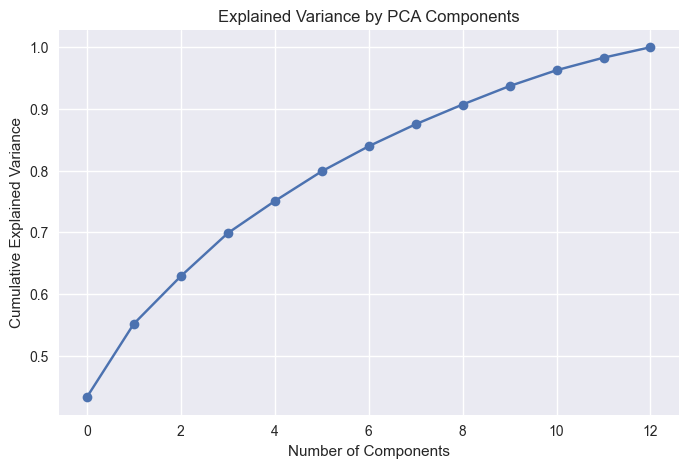

In [13]:
# Cell 7: Plot Explained Variance

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()


In [14]:
# Cell 8: Number of Components for 90% Variance

cumulative_variance = np.cumsum(explained_variance)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print("Number of components to retain 90% variance:", n_components_90)


Number of components to retain 90% variance: 9


In [15]:
# Cell 9: Reduce Dataset

pca_final = PCA(n_components=n_components_90)
reduced_data = pca_final.fit_transform(scaled_df)

print("Reduced dataset shape:", reduced_data.shape)


Reduced dataset shape: (2240, 9)


In [16]:
# Cell 10: PCA Loadings

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(numerical_features))],
    index=numerical_features
)

loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Income,0.316262,-0.029465,-0.016526,-0.382727,-0.001526,0.003852,-0.209899,0.407334,0.488545,0.335248,-0.389465,0.080578,0.181983
Recency,0.007316,-0.022117,0.995765,0.035904,-0.024883,-0.055401,-0.015754,-0.012285,0.036769,0.032565,0.004510,0.002824,0.009628
MntWines,0.315725,0.223503,0.021291,-0.346678,-0.206043,-0.091549,0.330636,-0.242093,-0.095860,-0.091428,-0.359316,-0.268978,-0.540330
MntFruits,0.301917,-0.122435,-0.047934,0.391603,0.143428,-0.219558,-0.013816,-0.357207,0.666622,-0.260590,0.066447,-0.153980,-0.034981
MntMeatProducts,0.338476,-0.127224,0.023453,-0.125955,0.304821,0.153015,0.394011,-0.011600,-0.009997,-0.099398,0.175282,0.724017,-0.127361


In [17]:
# Cell 11: Feature Contribution

pc1_contribution = loadings['PC1'].sort_values(ascending=False)
pc2_contribution = loadings['PC2'].sort_values(ascending=False)

print("Top Features in PC1:")
print(pc1_contribution.head())

print("\nTop Features in PC2:")
print(pc2_contribution.head())


Top Features in PC1:
NumCatalogPurchases    0.344484
MntMeatProducts        0.338476
Income                 0.316262
MntWines               0.315725
NumStorePurchases      0.314039
Name: PC1, dtype: float64

Top Features in PC2:
NumDealsPurchases    0.635197
NumWebPurchases      0.495957
NumWebVisitsMonth    0.407355
MntWines             0.223503
MntGoldProds         0.195424
Name: PC2, dtype: float64


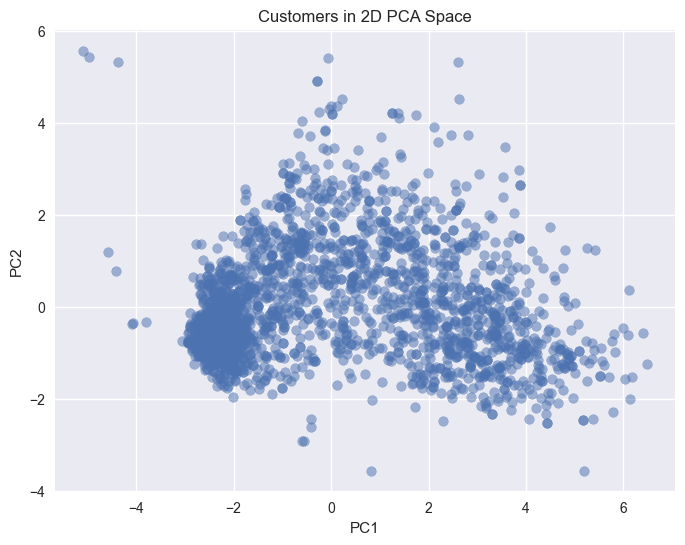

In [19]:
# Cell 12: 2D Visualization

pca_2d = PCA()
pca_2d_data = pca_2d.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(pca_2d_data[:,0], pca_2d_data[:,1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customers in 2D PCA Space")
plt.show()


In [20]:
# Cell 13: KMeans on Original Data

start = time.time()

kmeans_original = KMeans(n_clusters=4, random_state=42)
labels_original = kmeans_original.fit_predict(scaled_df)

time_original = time.time() - start
sil_original = silhouette_score(scaled_df, labels_original)

print("Silhouette Score (Original):", sil_original)
print("Time Taken (Original):", time_original)


Silhouette Score (Original): 0.16395386674918302
Time Taken (Original): 2.90692138671875


In [21]:
# Cell 14: KMeans on PCA Reduced Data

start = time.time()

kmeans_pca = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans_pca.fit_predict(reduced_data)

time_pca = time.time() - start
sil_pca = silhouette_score(reduced_data, labels_pca)

print("Silhouette Score (PCA):", sil_pca)
print("Time Taken (PCA):", time_pca)


Silhouette Score (PCA): 0.2685815564106689
Time Taken (PCA): 0.042122840881347656


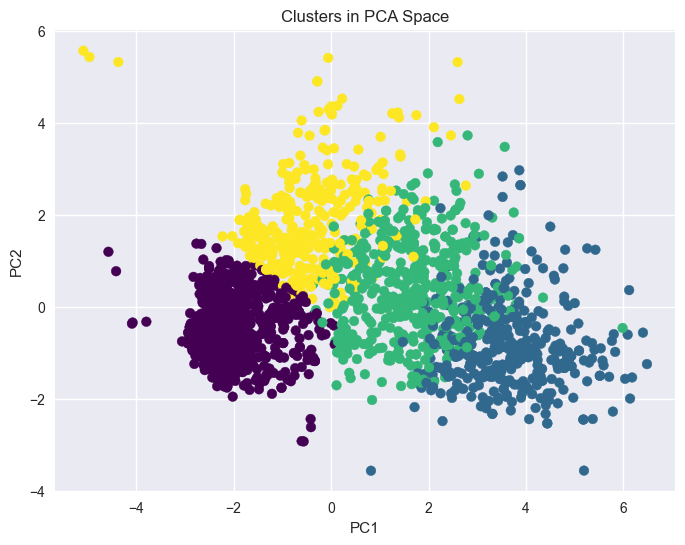

In [22]:
# Cell 15: PCA Cluster Visualization

plt.figure(figsize=(8,6))
plt.scatter(pca_2d_data[:,0], pca_2d_data[:,1], c=labels_pca, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters in PCA Space")
plt.show()
